In [1]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from scripts.SNR import SNR
from scripts.plot_images import plot_images
from scripts.plot_line_defect import plot_line
from scripts.Amp_phase_func import *

In [2]:
loaded_node_temp= pd.read_pickle(Dict_temp_0_182)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_0_182)

In [3]:
pd.read_pickle(Dict_temp_0_028).keys()

dict_keys([0.099984, 0.19997, 0.29995, 0.39994, 0.49992, 0.5999, 0.69989, 0.79987, 0.89986, 0.99984, 1.0998, 1.1998, 1.2998, 1.3998, 1.4998, 1.5997, 1.6997, 1.7997, 1.8997, 1.9997, 2.0997, 2.1996, 2.2996, 2.3996, 2.4996, 2.5996, 2.6996, 2.7996, 2.8995, 2.9995, 3.0995, 3.1995, 3.2995, 3.3995, 3.4994, 3.5994, 3.6994, 3.7994, 3.8994, 3.9994, 4.0993, 4.1993, 4.2993, 4.3993, 4.4993, 4.5993, 4.6992, 4.7992, 4.8992, 4.9992, 5.0992, 5.1992, 5.2992, 5.3991, 5.4991, 5.5991, 5.6991, 5.7991, 5.8991, 5.999, 6.099, 6.199, 6.299, 6.399, 6.499, 6.5989, 6.6989, 6.7989, 6.8989, 6.9989, 7.0989, 7.1988, 7.2988, 7.3988, 7.4988, 7.5988, 7.6988, 7.7988, 7.8987, 7.9987, 8.0987, 8.1987, 8.2987, 8.3987, 8.4986, 8.5986, 8.6986, 8.7986, 8.8986, 8.9986, 9.0985, 9.1985, 9.2985, 9.3985, 9.4985, 9.5985, 9.6984, 9.7984, 9.8984, 9.9984, 10.098, 10.198, 10.298, 10.398, 10.498, 10.598, 10.698, 10.798, 10.898, 10.998, 11.098, 11.198, 11.298, 11.398, 11.498, 11.598, 11.698, 11.798, 11.898, 11.998, 12.098, 12.198, 12.298, 1

In [4]:

intervals= {
        '0_182': [8.2917, 9.6903, 10.989, 12.488],
        '0_126': [11.995, 13.894, 15.893, 17.892],

        '0_93': [16.189, 18.887, 21.585, 24.184],

        
        '0_071': [21.107, 24.608, 28.109, 31.71],

        '0_055': [27.203, 31.803, 36.404, 40.904],
        
        '0_038': [39.494, 46.093, 52.692, 59.191],
        '0_028': [53.591, 62.49, 71.489, 80.387]
    }


Dict= pd.read_pickle(Dict_temp_0_028)

df_0_028 = pd.DataFrame()
df_0_028["First"]= Dict[53.591]
df_0_028["second"]= Dict[62.49]
df_0_028["Third"]= Dict[ 71.489]
df_0_028["Fourth"]=Dict[  80.387]
df_0_028.to_csv('df_0_028.csv', index=False)

In [5]:
import os
import pandas as pd
from collections import OrderedDict

# Define the interval keys and their corresponding pickle file paths
interval_files = {
    '0_182': 'dict_temp_0_182.p',
    '0_126': 'dict_temp_0_126.p',
    '0_93': 'dict_temp_0_93.p',
    '0_071': 'dict_temp_0_071.p',
    '0_055': 'dict_temp_0_055.p',
    '0_038': 'dict_temp_0_038.p',
    '0_028': 'dict_temp_0_028.p'
}

# Create a directory to save the DataFrames as pickles
output_dir = 'dataframes_pickles'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the pickle files
for interval_key, pickle_filename in interval_files.items():
    file_path = os.path.join(DATA_CLEAN_Temp, pickle_filename)
    
    if os.path.isfile(file_path):
        Dict = pd.read_pickle(file_path)
        
        for value in intervals[interval_key]:
            df = pd.DataFrame()
            df[f"First_{interval_key}"] = Dict[value]
            df[f"Second_{interval_key}"] = Dict[value]
            df[f"Third_{interval_key}"] = Dict[value]
            df[f"Fourth_{interval_key}"] = Dict[value]
            
            # Save the DataFrame to a pickle file
            df_filename = f"df_{interval_key}_{value}.p"
            df_path = os.path.join(output_dir, df_filename)
            df.to_pickle(df_path)


In [6]:
import os
import pandas as pd
import numpy as np

# Load the pickled DataFrames and calculate phase and amplitude
output_dir = 'dataframes_pickles'
calculated_dataframe = pd.DataFrame()

for df_filename in os.listdir(output_dir):
    if df_filename.endswith(".p"):
        df_path = os.path.join(output_dir, df_filename)
        df = pd.read_pickle(df_path)
        print(df)
       # Calculate Amplitude using column indices
        A = ((df.iloc[:, 0] - df.iloc[:, 2])**2) + \
            ((df.iloc[:, 1] - df.iloc[:, 3])**2)
        Amp = np.sqrt(A)
        
        # Calculate Phase using column indices
        phase = np.arctan((df.iloc[:, 0] - df.iloc[:, 1]) /
                          (df.iloc[:, 1] - df.iloc[:, 3]))
        print(Amp, phase)
        

      First_0_028  Second_0_028  Third_0_028  Fourth_0_028
0       26.812442     26.812442    26.812442     26.812442
1       26.812680     26.812680    26.812680     26.812680
2       26.812615     26.812615    26.812615     26.812615
3       26.813067     26.813067    26.813067     26.813067
4       26.812886     26.812886    26.812886     26.812886
...           ...           ...          ...           ...
8882    27.291575     27.291575    27.291575     27.291575
8883    27.417657     27.417657    27.417657     27.417657
8884    27.438608     27.438608    27.438608     27.438608
8885    27.417177     27.417177    27.417177     27.417177
8886    27.437041     27.437041    27.437041     27.437041

[8887 rows x 4 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8882    0.0
8883    0.0
8884    0.0
8885    0.0
8886    0.0
Length: 8887, dtype: float64 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8882   NaN
8883   NaN
8884   NaN
8885   

In [7]:
 A = ((df.iloc[:, 0] - df.iloc[:, 2])**2) + \
            ((df.iloc[:, 1] - df.iloc[:, 3])**2)
Amp = np.sqrt(A)

In [8]:
df

,First_0_182,Second_0_182,Third_0_182,Fourth_0_182
0,25.541282,25.541282,25.541282,25.541282
1,25.540651,25.540651,25.540651,25.540651
2,25.540664,25.540664,25.540664,25.540664
3,25.540525,25.540525,25.540525,25.540525
4,25.540566,25.540566,25.540566,25.540566
...,...,...,...,...
8882,25.863098,25.863098,25.863098,25.863098
8883,25.956989,25.956989,25.956989,25.956989
8884,25.968458,25.968458,25.968458,25.968458
8885,25.954900,25.954900,25.954900,25.954900


In [9]:
Amp

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8882    0.0
8883    0.0
8884    0.0
8885    0.0
8886    0.0
Length: 8887, dtype: float64

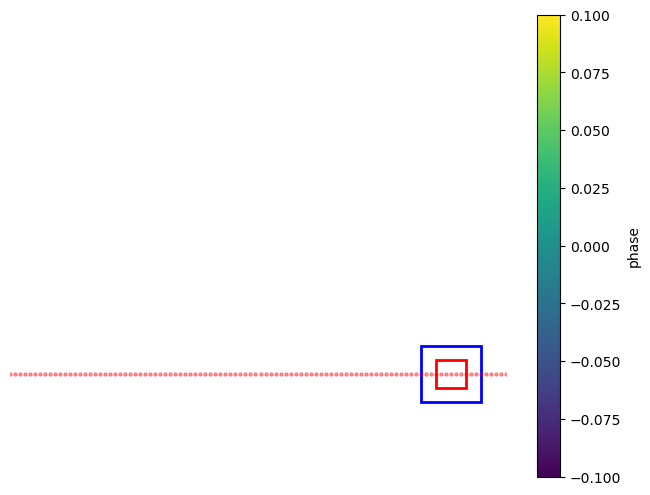

(nan, nan, nan)

In [10]:
SNR(loaded_nodes_loc,phase, fixed_y=0.04,fixed_x=0.16,  label="phase")